# Évolution de la population mondiale

__Pierre SAUNDERS__

## Librairies utilisées

_Environnement tidyverse_
- [Doc](https://readxl.tidyverse.org/) - readxl : Permet la lecture de fichiers Excel (xlsx/xls)
- [Doc](https://ggplot2.tidyverse.org/reference/) - ggplot2 : Permet de faire des plots à partir de DataFrame

_Autres_
- [Doc](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html) - gridExtra : Add-on de ggplot2 permettant des plot multiples sur la même image.

In [1]:
library(readxl)
library(ggplot2)
library(gridExtra)

## Étude

Il est bien connu que la population mondiale compte désormais plus de sept milliards et demi d’individus et qu’elle est en augmentation constante.
Par contre, on dit que la population européenne n’augment que très légèrement au fil des années et qu’elle de plus en plus âgée.
Afin de vérifier ces deux affirmations, nous allons utiliser la base donnée qui se trouve [ici](https://www.kaggle.com/theworldbank/global-population-estimates).
Il s’agira d’utiliser les données dans la plage 1960-2010 pour calculer la moyenne et variance des variables aléatoires qui nous intéressent.
Puis on utilisera les données de 2011 à 2017 comme ́échantillon pour la vérification des hypothèses.
On utilisera la même technique d’exploitation des séries temporelles pour ́étudier la proportion de population âgée de plus de 65 ans par rapport au reste de la population.
En prenant les données qui se trouvent [ici](https://www.insee.fr/fr/statistiques/2387502), fournies par l’INSEE, est-ce que l'on peut ́établir une corrélation entre le niveau de dépenses de santé et le vieillissement de la population ?

### Hypothèses

1. Corrélation positive entre l'année et la population mondiale
2. Moyenne population européenne de $[1960, 2010]$ < Moyenne population européenne de $[2011, 2017]$
3. Croissance mondiale de $[1960, 2010]$ > Croissance européenne de $[2011, 2017]$
4. Proportion de personne européenne âgée de plus de 65 ans en $[1960, 2010]$ < Proportion de personne européenne âgée de plus de 65 ans en $[2011, 2017]$
5. Corrélation entre l'espérance de vie et la dépense de santé courante (INSEE) en Europe

Toutes les hypothèses seront testées avec un niveau de signification $\alpha = 0.05$

### Test de Student

#### Fonction t-value pour échantillons indépendants

- $\bar{X}$ : moyenne observée
- $n$ : taille échantillon
- $\sigma$ : écart-type


$\rightarrow$ pour chaque population $A$ et $B$

Note: Variance = $\sigma^2$

$\large{t = \frac{\bar{X}_{A}-\bar{X}_B}{\sqrt{\frac{\sigma_{A}^2}{n_A}+\frac{\sigma_{B}^2}{n_B}}}}$

In [2]:
test_student_independants = function(pop_a, pop_b){
    (mean(pop_a) - mean(pop_b)) / sqrt(var(pop_a) / length(pop_a) + var(pop_b) / length(pop_b))
}

## Fichier Global Population estimates (Kaggle)

Le fichier __data.csv__ a été convertie au format xlsx, les watermarks ont été supprimées,  puis le fichier a été renommé en __estim.xlsx__ et placé dans le dossier __converted__.

In [3]:
estim = read_excel("converted/estim.xlsx")
head(estim)

Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2041 [YR2041],2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050]
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,Age dependency ratio (% of working-age population),SP.POP.DPND,8.171774e+01,8.275591e+01,8.330457e+01,8.355074e+01,8.373445e+01,8.396216e+01,...,49.057098,48.405124,47.772482,47.153619,4.654737e+01,46.014974,45.488733,44.972113,44.471497,4.399248e+01
Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.086262e+00,5.132609e+00,5.139524e+00,5.111895e+00,5.056182e+00,4.976304e+00,...,6.254638,6.431854,6.615935,6.808329,7.010657e+00,7.235972,7.465706,7.699483,7.935899,8.175734e+00
Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,7.663148e+01,7.762330e+01,7.816505e+01,7.843884e+01,7.867827e+01,7.898586e+01,...,42.802460,41.973270,41.156547,40.345290,3.953671e+01,38.779002,38.023028,37.272630,36.535598,3.581675e+01
Afghanistan,AFG,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,1.785560e+05,1.826740e+05,1.854340e+05,1.875130e+05,1.899450e+05,1.935530e+05,...,NA,NA,NA,NA,4.520000e+05,NA,NA,NA,NA,4.300000e+05
Afghanistan,AFG,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,1.776350e+05,1.815880e+05,1.858520e+05,1.904620e+05,1.954980e+05,2.010140e+05,...,NA,NA,NA,NA,4.760000e+05,NA,NA,NA,NA,4.520000e+05
Afghanistan,AFG,"Age population, age 01, female, interpolated",SP.POP.AG01.FE.IN,1.623200e+05,1.714910e+05,1.699620e+05,1.738000e+05,1.779260e+05,1.825620e+05,...,NA,NA,NA,NA,4.540000e+05,NA,NA,NA,NA,4.320000e+05


In [4]:
print(sprintf("Le fichier estim.xlsx posséde %d * %d lignes", ncol(estim), nrow(estim)))

[1] "Le fichier estim.xlsx posséde 95 * 44807 lignes"


### Transformation, pré-traitement

La base de données est très fourni (43 Mo au format csv, 29 Mo au format xlsx pour 95 colonnes * 44807 lignes), mais seul certaines informations nous intéressent.
Nous allons ne garde que les lignes concernant l'Union Européenne et le monde, et parmi ces lignes nous allons garder ne que la population totale (réduit à l'échelle du million), la croissance et l'espérance.

In [5]:
years_mask = c(5:95)
seuil = 1e6
x = as.numeric(lapply(colnames(estim)[years_mask], function(x){ substr(x, 1, 4) }))

y = estim[estim$'Country Name' == 'European Union',]
y1_1 = as.numeric(y[y$'Series Code' == 'SP.POP.TOTL', years_mask]) / seuil
y1_2 = as.numeric(y[y$'Series Code' == 'SP.POP.GROW', years_mask])
y1_3 = as.numeric(y[y$'Series Code' == 'SP.DYN.LE00.IN', years_mask])
y1_4 = as.numeric(y[y$'Series Code' == 'SP.POP.65UP.TO.ZS', years_mask])
y = estim[estim$'Country Name' == 'World',]
y2_1 = as.numeric(y[y$'Series Code' == 'SP.POP.TOTL', years_mask]) / seuil
y2_2 = as.numeric(y[y$'Series Code' == 'SP.POP.GROW', years_mask])
y2_3 = as.numeric(y[y$'Series Code' == 'SP.DYN.LE00.IN', years_mask])

df = data.frame(x, y1_1, y1_2, y1_3, y1_4, y2_1, y2_2, y2_3)
colnames(df) = c("Annee", "Population_euro", "Croissance_euro",
                 "Esperance_euro", "Senior", "Population_mondiale",
                 "Croissance_mondiale", "Esperance_mondiale")

#### Preview de la dataframe

In [6]:
head(df)

,Annee,Population_euro,Croissance_euro,Esperance_euro,Senior,Population_mondiale,Croissance_mondiale,Esperance_mondiale
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,409.4985,NA,69.27954,9.834965,3034.193,NA,52.47476
2,1961,413.0070,0.8567903,69.58937,9.978808,3075.115,1.348696,52.98085
3,1962,416.6706,0.8870627,69.51457,10.126404,3127.961,1.718509,53.40420
4,1963,420.3933,0.8934289,69.75930,10.277910,3192.794,2.072689,53.93546
5,1964,424.0759,0.8759809,70.22604,10.433138,3258.201,2.048585,54.61296
6,1965,427.5926,0.8292731,70.33690,10.596198,3324.952,2.048681,55.28044


### Exemple de graphiques

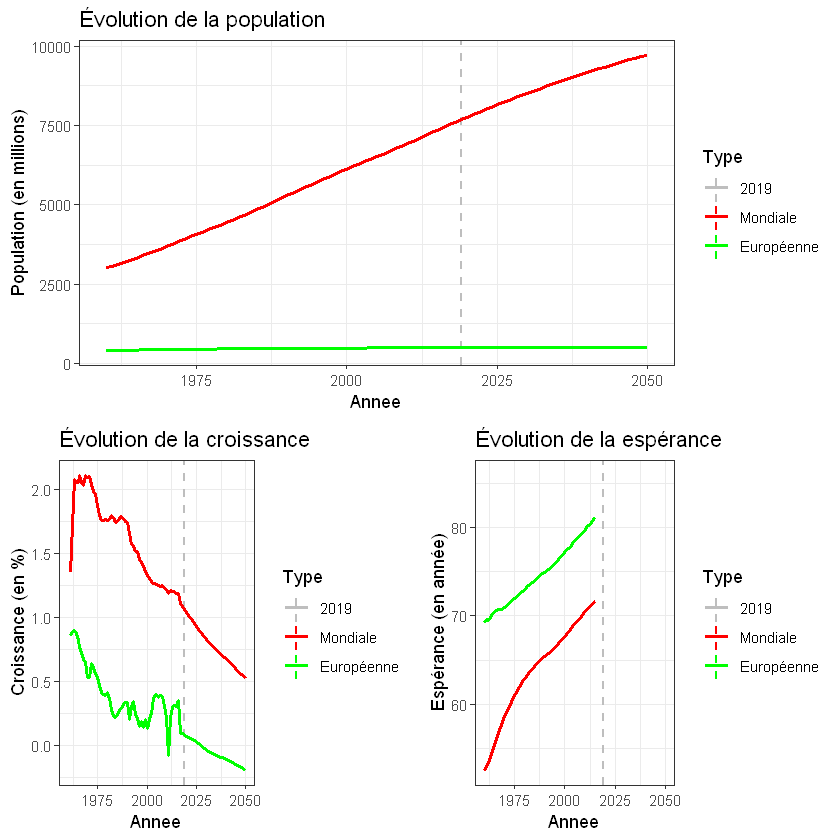

In [7]:
p1 = ggplot(df, aes(x = Annee)) +
geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
geom_line(aes(y = Population_mondiale, colour = "1"), size = 1, na.rm = TRUE) +
geom_line(aes(y = Population_euro, colour = "2"), size = 1, na.rm = TRUE) +
ylab("Population (en millions)") +
ggtitle("Évolution de la population") +
scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne")) + 
theme_bw()

p2 = ggplot(df, aes(x = Annee)) +
geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
geom_line(aes(y = Croissance_mondiale, colour = "1"), size = 1, na.rm = TRUE) +
geom_line(aes(y = Croissance_euro, colour = "2"), size = 1, na.rm = TRUE) +
ylab("Croissance (en %)") +
ggtitle("Évolution de la croissance") +
scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne")) + 
theme_bw()

p3 = ggplot(df, aes(x = Annee)) +
geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
geom_line(aes(y = Esperance_mondiale, colour = "1"), size = 1, na.rm = TRUE) +
geom_line(aes(y = Esperance_euro, colour = "2"), size = 1, na.rm = TRUE) +
ylab("Espérance (en année)") +
ggtitle("Évolution de la espérance") +
scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne")) + 
theme_bw()

grid.arrange(p1, arrangeGrob(p2, p3, ncol = 2))

## Corrélation positive entre la population mondiale et l'année (Hypothèse 1)

Nous voyons visuellement que l'évolution de la population mondiale est linéaire et croissante.
Pour prouver cela, nous allons l'approcher par une régeression linéaire d'une fonction affine de type $\hat{Y} = ax + b$ et évaluer son coefficient de détermination. S'il est suffisamment proche de 1, nous ne pouvons pas rejeter cette hypothèse.

Nous allons donc placer une ligne aux coefficients $a$ et $b$ de telle sorte à que $\hat{Y}$ soit suffisamment proche de la data $Y$ (i.e. $\epsilon_i$ est suffisament bas).

$\large{y_i = b + a x_i + \epsilon_i}$

Nous mesurerons l'écart entre les deux droites avec l'erreur quadratique moyenne (ou Mean Squared Error MSE).

$\large{
\epsilon_i = y_i-ax_i+b \hspace{1cm}
J(a,b) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon_i^2
}$

Pour nous faciliter la vie, nous allons écrire le tout avec des vecteurs.

Nos prédictions seront alors dans un vecteur $\hat{Y} = X.\theta$

$\large{
\theta = \begin{bmatrix}b\\a\end{bmatrix} \hspace{1cm}
Y = \begin{bmatrix} y_1\\ y_2 \\ ... \\ y_m \end{bmatrix} \hspace{1cm}
X = \begin{bmatrix} 1&x_1 \\ 1&x_2 \\ ...&... \\ 1&x_m \end{bmatrix} \hspace{1cm}
}$

$\large{\epsilon = y_i - (\theta_0 + \theta_1 x_i) = Y-X.\theta} = Y - \hat{Y}$

$\large{J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon^2}$

Pour pouvoir faire un régréssion linéaire la plus adéquate possible, on cherche à minimiser cet erreur $J(\theta)$, la fonction étant convexe nous cherchons alors à résoudre

$\large{ \frac{\partial J(\theta)}{\partial\theta} = 0}$

Pas à pas cela nous donne d'abord $\theta_0$

$\large{\frac{\partial J(\theta)}{\partial\theta_0} = \frac{\partial J(\theta)}{\partial\epsilon} \cdot \frac{\partial\epsilon}{\partial\theta_0} = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m 2(Y_i-\theta_0-\theta_1X_i) * 1}$

$\large{0 = 2\sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^mY_i -m\theta_0-\theta_1\sum\limits_{i=1}^mX_i}$

$\large{m\theta_0 = \sum\limits_{i=1}^mY_i -\theta_1\sum\limits_{i=1}^mX_i}$

$\large{\large{\theta_0 = \bar{Y} -\theta_1 \bar{X}}}$

Ensuite pour $\theta_1$

$\large{\frac{\partial J(\theta)}{\partial\theta_1} = \sum\limits_{i=1}^m(Y_i-\theta_0+\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m -2(Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = -2\sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i-\theta_0 X-\theta_1X_i^2)}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i) - \theta_0\sum\limits_{i_1}^m X_i - \theta_1\sum\limits_{i=1}^m X_i^2}$

$\large{0 = \overline{XY} - \theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{-\overline{XY} = -\theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{\overline{XY} = \theta_0\bar{X} + \theta_1\bar{X^2}}$

Avec le résultat $\theta_0$ obtenu précédement

$\large{\overline{XY} = (\bar{Y} - \theta_1\bar{X})\bar{X} + \theta_1\bar{X^2}}$

$\large{\overline{XY} = \bar{Y}\bar{X} - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1\bar{X^2} - \theta_1\bar{X}^2}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1(\bar{X^2} - \bar{X}^2)}$

$\large{\theta_1 = \frac{\overline{XY} - \bar{Y}\bar{X}}{\bar{X^2} - \bar{X}^2}}$

Chaque échantillion étant indépendant $E(X) = \frac{1}{m}\sum\limits_{i=1}^m X_i$

$\large{\theta_1 = \frac{
E(X,Y) - E(X)E(Y)
}{
(\frac{1}{m}\sum\limits_{i=1}^m X_i^2) - \bar{X}^2
}}$

$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2}}$

### Maintenant que cela est dit, passons au code

$\large{\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n x_i}$

In [8]:
x_bar = mean(df$Annee)
print(paste("x_bar =", x_bar))

[1] "x_bar = 2005"


$\large{\bar{Y} = \frac{1}{n}\sum\limits_{i=1}^n y_i}$

In [9]:
y_bar = mean(df$Population_mondiale)
print(paste("y_bar =", y_bar))

[1] "y_bar = 6473.45632771129"


$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2} = 78.244}$

In [10]:
theta_1 = cov(df$Annee, df$Population_mondiale) / var(df$Annee)
print(paste("theta_1 =", theta_1))

[1] "theta_1 = 78.2438930928207"


$\large{\theta_0 = \bar{Y} - \theta_1 \bar{X} = -150405.549}$

In [11]:
theta_0 = y_bar - theta_1 * x_bar
print(paste("theta_0 =", theta_0))

[1] "theta_0 = -150405.549323394"


$\large{\hat{Y} = \hat{f}(x) = \theta_0 + \theta_1 x}$

In [12]:
df$Prediction = theta_0 + theta_1 * df$Annee

### Visualisation de la prédiction

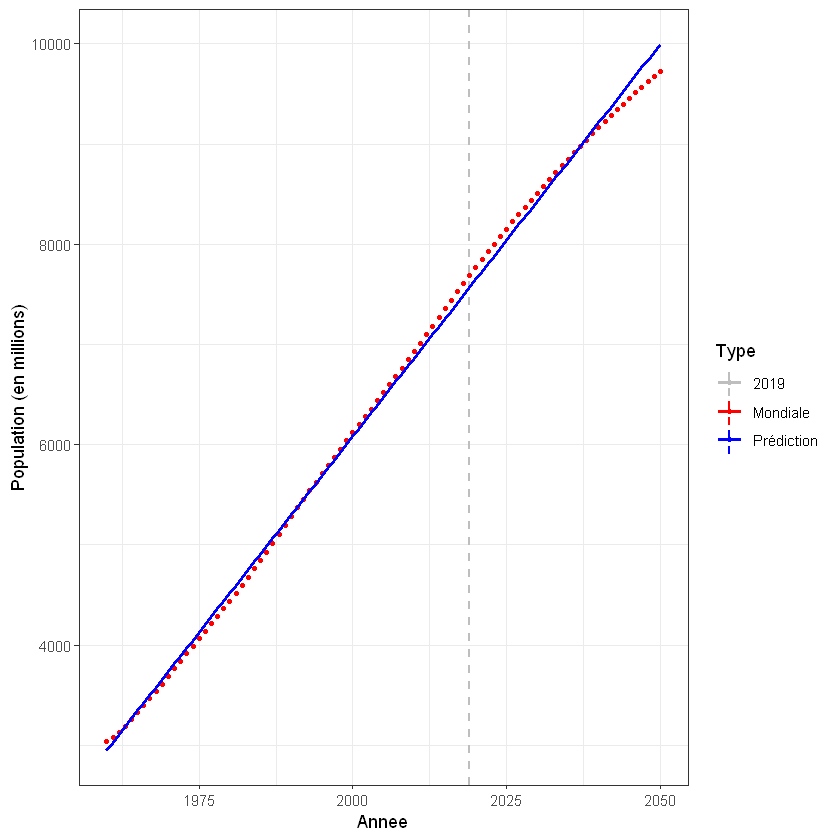

In [13]:
ggplot(df, aes(x = Annee)) +
geom_point(aes(y = Population_mondiale, colour = "1"), size = 1) +
geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
geom_line(aes(y = Prediction, colour = "2"), size = 1) +
ylab("Population (en millions)") +
scale_colour_manual(name = "Type", values = c("grey", "red", "blue"), labels = c("2019", "Mondiale", "Prédiction")) +
theme_bw()

### Mesure de l'adéquation du modèle

Analyse de la variance

Somme total des carrés = Somme des carrés de régréssion + Somme des carrés des erreurs

$\large{SST = SSR + SSE}$

$\large{\sum\limits_{i=1}^m(y_i-\bar{y})^2 = \sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2 + \sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}$

In [14]:
y_bar = mean(df$Population_mondiale)
print(paste("y_bar =", y_bar))
sst = sum((df$Population_mondiale - y_bar)^2)
print(paste("sst =", sst))
ssr = sum((df$Prediction - y_bar)^2)
print(paste("ssr =", ssr))
sse = sum((df$Population_mondiale - df$Prediction)^2)
print(paste("sse =", sse))

[1] "y_bar = 6473.45632771129"
[1] "sst = 385075719.013343"
[1] "ssr = 384407086.36888"
[1] "sse = 668632.644463659"


Critère relative

$R^2$: coefficient de détermination

$\large{R^2 = \frac{SSR}{SST} = \frac{\sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

Ou

$\large{R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

$0 \leq R^2 \leq 1$

$R^2 \approx 1 \rightarrow$ Le modéle est adéquat.

$R^2 \approx 0 \rightarrow$ Le modéle est inadéquat.

In [15]:
print(paste("R^2 =", 1 - sse/sst))

[1] "R^2 = 0.998263633328591"


In [16]:
print(paste("R^2 =", ssr / sst))

[1] "R^2 = 0.998263633328592"


__Notre modèle explique 99.83% de la variance de la data__

$R$: Coefficient de corrélation

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ corrélation négative

$R \approx 0 \rightarrow$ aucune corrélation

$R \approx 1 \rightarrow$ corrélation positive

In [17]:
r = cov(df$Annee, df$Population_mondiale) / (sd(df$Annee) * sd(df$Population_mondiale))
print(paste("R =", r))

[1] "R = 0.999131439465595"


__Notre modéle ne nous permet pas de rejeter l'hypothèse $H_0$__

#### Unités de mesure de l'adéquation du modèle

Moyenne des erreurs absolue (UK: Mean Absolute Error)

$\large{MAE = \frac{1}{N}\sum\limits_{i=1}^N|y_i-\hat{y}_i|}$

In [18]:
print(paste("MAE =", mean(abs(df$Population_mondiale - df$Prediction))))

[1] "MAE = 69.3300518887301"


Moyenne des racines des erreurs (UK: Mean Squared Error)

$\large{MSE = \frac{1}{N}\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{SSE}{N}}$

In [19]:
mse = sse / (length(df$Annee))
print(paste("MSE =", mse))

[1] "MSE = 7347.61147762263"


Racine de la moyenne des racines des erreurs (UK: Root Mean Squared Error)

$\large{RMSE = \sqrt{MSE}}$

In [20]:
rmse = sqrt(mse)
print(paste("RMSE =", rmse))

[1] "RMSE = 85.7182097201209"


## Analyse de résidus

- Formule de résidu
$\rightarrow \large{\epsilon_i = y_i - \hat{y}_i}$

- Résidu studentisés
$\rightarrow \large{\epsilon_i = \frac{y_i - \hat{y}_i}{RMSE\sqrt{1-h_i}}}$

where
$\rightarrow \large{h_i=\frac{1}{N}+\frac{(x_i-\bar{x})^2}{\sum\limits_{i=1}^N(x_i-\bar{x})^2}}$

In [21]:
x_bar = mean(df$Annee)
h = 1 / length(df$Annee) + ((df$Annee - x_bar)^2) / sum((df$Annee - x_bar)^2)
e = (df$Population_mondiale - df$Prediction) / (sqrt(1 - h))
stde = (df$Population_mondiale - df$Prediction) / (rmse * sqrt(1 - h))
residus = data.frame(x = df$Annee, "Influence" = h, "Résidus" = e, stde = stde)

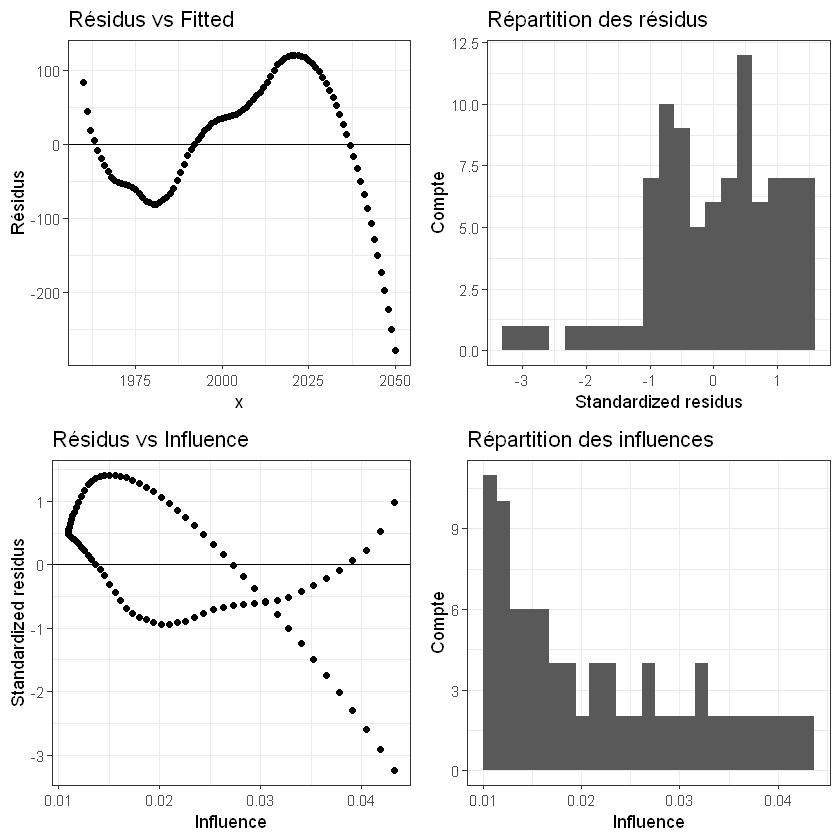

In [22]:
rvl = ggplot(residus) +
geom_point(aes(x = Influence, y = stde)) +
ylab("Standardized residus") +
geom_hline(aes(yintercept = 0)) +
ggtitle("Résidus vs Influence") +
theme_bw()

hist_e = ggplot(residus) +
geom_histogram(aes(x = stde), bins = 20) +
xlab("Standardized residus") +
ylab("Compte") +
ggtitle("Répartition des résidus") +
theme_bw()

rvf = ggplot(residus) +
geom_point(aes(x = x, y = Résidus)) +
geom_hline(aes(yintercept = 0)) +
ggtitle("Résidus vs Fitted") +
theme_bw()

hist_l = ggplot(residus) +
geom_histogram(aes(x = Influence), bins = 25) +
ylab("Compte") +
xlab("Influence") +
ggtitle("Répartition des influences") +
theme_bw()

grid.arrange(rvf, hist_e, rvl, hist_l)

## La moyenne de la population a augmenté entre $[1960, 2010]$ et $[2011, 2017]$ (Hypothèse 2)

Nous allons donc tester l'hypothèse (unilatérale gauche) suivante

$\mu_{pop1} = \frac{1}{n}\sum\limits_{i=1}^n population\_mondiale[1960, 2010]^{(i)} \hspace{1cm} \mu_{pop2} = \frac{1}{n}\sum\limits_{i=1}^n population\_mondiale[2011, 2017]^{(i)}$

$H_0 = \mu_{pop1} - \mu_{pop2} \geq 0$

$H_1 = \mu_{pop1} - \mu_{pop2} < 0$

$ddl = n_1 + n_2 - 2 = 51 + 7 - 2 = 56$

Valeur critique (p-value) $\rightarrow -1.6725$

In [23]:
df_1 = df[df$Annee >= 1960 & df$Annee <= 2010,]
df_2 = df[df$Annee >= 2011 & df$Annee <= 2017,]
pop1 = df_1$Population_mondiale
pop2 = df_2$Population_mondiale
t_value = test_student_independants(pop1, pop2)
print(paste("t_value =", t_value))
p_value = qt(0.05, df = length(pop1) + length(pop2) - 2, lower.tail = TRUE)
print(paste("p_value =", p_value))
print(paste("t_value < p_value ?", t_value < p_value))

[1] "t_value = -13.1374810522537"
[1] "p_value = -1.67252230307558"
[1] "t_value < p_value ? TRUE"


__On peux donc rejeter l'hypothèse $H_0$__

## La croissance mondiale de $[1960, 2010]$ est supérieure à la croissance européenne $[2011, 2017]$ (Hypothèse 3)

Nous allons donc tester l'hypothèse (unilatéral gauche) suivante

$C_{m} = \frac{1}{n}\sum\limits_{i=1}^n croissance\_mondiale[1960, 2010]^{(i)} \hspace{1cm} C_{e} = \frac{1}{n}\sum\limits_{i=1}^n croissance\_europeenne[2011, 2017]^{(i)}$

$H_0 = C_{m} - C_{e} \geq 0$

$H_1 = C_{m} - C_{e} < 0$

$ddl = n_1 + n_2 - 2 = 51 + 7 - 2 = 56$

Valeur critique (p-value) $\rightarrow -1.6725$

In [24]:
c_m = df_1$Croissance_mondiale[-c(1)] # La première valeur est NA
c_e = df_2$Croissance_euro
t_value = test_student_independants(c_m, c_e)
print(paste("t_value =", t_value))
p_value = qt(0.05, df = length(c_m) + length(c_e) - 2, lower.tail = TRUE)
print(paste("p_value =", p_value))
print(paste("t_value < p_value ?", t_value < p_value))

[1] "t_value = 20.2333656712816"
[1] "p_value = -1.67303396528991"
[1] "t_value < p_value ? FALSE"


__On ne peux donc pas rejeter l'hypothèse $H_0$__

## La proportion de personne européenne âgée de plus de 65 ans est inférieur en $[1960, 2010]$ que en $[2011, 2017]$ (Hypothèse 4)

Nous allons donc tester l'hypothèse (unilatéral droite) suivante

$S_1 = \frac{1}{n}\sum\limits_{i=1}^n proportion\_senior[1960, 2010]^{(i)} \hspace{1cm} S_{2} = \frac{1}{n}\sum\limits_{i=1}^n proportion\_senior[2011, 2017]^{(i)}$

$H_0 = S_1 - S_2 \leq 0$

$H_1 = S_1 - S_2 > 0$

$ddl = n_1 + n_2 - 2 = 51 + 7 - 2 = 56$

Valeur critique (p-value) $\rightarrow 1.6725$

In [25]:
S_1 = df_1$Senior
S_2 = df_2$Senior
t_value = test_student_independants(S_1, S_2)
print(paste("t_value =", t_value))
p_value = qt(0.05, df = length(S_1) + length(S_2) - 2, lower.tail = FALSE)
print(paste("p_value =", p_value))
print(paste("t_value > p_value ?", t_value > p_value))

[1] "t_value = -12.7890414432725"
[1] "p_value = 1.67252230307558"
[1] "t_value > p_value ? FALSE"


__On ne peux donc pas rejeter l'hypothèse $H_0$__

## Fichier dépense courante de santé dans les pays de l'OCDE (INSEE)

Nous avons retiré les watermarks du fichier __cond-sante-dep-courante-monde.xls__, nous l'avons renommée en __depcours.xls__ et placé dans le dossier __converted__.

In [26]:
dep = read_excel("converted/depcour.xls")
head(dep)

Pays,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
États-Unis,12.542,13.219,14.007,14.522,14.610,14.606,14.703,14.926,15.301,16.310,16.382,16.350,16.329,16.257,16.443,16.749,17.121,17.061,16.937
Suisse,9.844,10.231,10.641,10.936,11.004,10.822,10.214,10.016,10.151,10.809,10.699,10.769,11.058,11.314,11.494,11.884,12.221,12.346,12.183
Allemagne,9.837,9.872,10.117,10.338,10.080,10.228,10.117,9.971,10.157,11.140,11.005,10.721,10.777,10.932,10.960,11.088,11.131,11.247,11.229
France,9.584,9.706,10.022,10.083,10.164,10.215,10.398,10.335,10.514,11.301,11.239,11.203,11.315,11.436,11.571,11.459,11.508,11.330,11.197
Suède,7.402,8.022,8.349,8.453,8.252,8.268,8.151,8.064,8.303,8.935,8.477,10.666,10.926,11.089,11.130,11.004,10.976,11.019,11.037
Japon,7.151,7.359,7.473,7.611,7.657,7.781,7.808,7.890,8.200,9.058,9.157,10.617,10.791,10.792,10.832,10.886,10.826,10.936,10.918


### Transposition en dataframe

In [27]:
dep = t(dep)
colnames(dep) = dep[1,]
rownames(dep) = NULL
dep = data.frame(apply(dep[-c(1),], 2, function(x) as.numeric(as.character(x))))
dep = data.frame(Annee = (2000:2018), dep)
head(dep)

,Annee,États.Unis,Suisse,Allemagne,France,Suède,Japon,Canada,Danemark,Belgique,...,Irlande,Lituanie,Slovaquie,Hongrie,Estonie,Pologne,Lettonie,Mexique,Luxembourg,Turquie
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,12.542,9.844,9.837,9.584,7.402,7.151,8.248,8.104,7.942,...,5.905,6.192,5.313,6.765,5.165,5.298,5.448,4.449,5.901,4.622
2,2001,13.219,10.231,9.872,9.706,8.022,7.359,8.625,8.448,8.105,...,6.399,6.006,5.340,6.817,4.788,5.679,5.778,4.820,6.410,4.924
3,2002,14.007,10.641,10.117,10.022,8.349,7.473,8.857,8.703,8.263,...,6.675,6.136,5.517,7.110,4.733,6.079,5.769,5.072,6.738,5.101
4,2003,14.522,10.936,10.338,10.083,8.453,7.611,9.011,8.904,9.106,...,7.009,6.179,5.458,8.117,4.881,5.962,5.490,5.815,6.971,5.059
5,2004,14.610,11.004,10.080,10.164,8.252,7.657,9.066,9.007,9.125,...,7.225,5.506,6.480,7.762,5.156,5.869,6.229,5.954,7.347,4.959
6,2005,14.606,10.822,10.228,10.215,8.268,7.781,9.035,9.091,9.007,...,7.648,5.642,6.598,7.997,5.091,5.807,5.860,5.836,7.184,4.942


### Suppression des états ne faisant pas parti de l'Union Européenne

In [28]:
hors_eu = c("États.Unis", "Japon", "Chili", "Corée.du.sud", "Slovénie", "Israël", "Mexique", "Turquie", "Canada", "Australie", "Nouvelle-Zélande")
dep = dep[!(colnames(dep) %in% hors_eu)]
dep = dep[dep$Annee <= 2015,]
head(dep)

,Annee,Suisse,Allemagne,France,Suède,Danemark,Belgique,Autriche,Norvège,Pays.Bas,...,Grèce,République.tchèque,Irlande,Lituanie,Slovaquie,Hongrie,Estonie,Pologne,Lettonie,Luxembourg
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,9.844,9.837,9.584,7.402,8.104,7.942,9.204,7.709,7.707,...,7.243,5.718,5.905,6.192,5.313,6.765,5.165,5.298,5.448,5.901
2,2001,10.231,9.872,9.706,8.022,8.448,8.105,9.269,8.021,8.059,...,7.988,5.888,6.399,6.006,5.340,6.817,4.788,5.679,5.778,6.410
3,2002,10.641,10.117,10.022,8.349,8.703,8.263,9.395,9.005,8.649,...,8.234,6.199,6.675,6.136,5.517,7.110,4.733,6.079,5.769,6.738
4,2003,10.936,10.338,10.083,8.453,8.904,9.106,9.547,9.219,9.057,...,8.198,6.554,7.009,6.179,5.458,8.117,4.881,5.962,5.490,6.971
5,2004,11.004,10.080,10.164,8.252,9.007,9.125,9.709,8.826,9.111,...,7.932,6.385,7.225,5.506,6.480,7.762,5.156,5.869,6.229,7.347
6,2005,10.822,10.228,10.215,8.268,9.091,9.007,9.627,8.333,9.097,...,8.997,6.381,7.648,5.642,6.598,7.997,5.091,5.807,5.860,7.184


### Traduction des noms des pays en Anglais

In [29]:
trad = c('Annee', 'Switzerland', 'Germany', 'France', 'Sweden', 'Denmark', 'Belgium', 'Austria', 'Norway', 'Netherlands', 'United Kingdom',
         'New Zealand', 'Portugal', 'Finland', 'Spain', 'Italy', 'Iceland', 'Greece', 'Czech Republic', 'Ireland', 'Lithuania', 'Slovak Republic',
         'Hungary', 'Estonia', 'Poland', 'Latvia', 'Luxembourg')

## Est qu'il existe une corrélation entre l'espérance de vie et la dépense de santé courante en Europe (Hypothèse 5)

Nous allons calculer le coefficient de corrélation pour chaque pays en croisant les data frames

Pour rappel:

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ corrélation négative

$R \approx 0 \rightarrow$ aucune corrélation

$R \approx 1 \rightarrow$ corrélation positive

In [30]:
esp = estim[estim$'Series Code' == 'SP.DYN.LE00.IN' & estim$'Country Name' %in% trad, c(1,45:60)]
esp = t(as.data.frame(esp))
rownames(esp) = NULL
colnames(esp) = esp[1,]
esp = esp[-c(1),]
esp = data.frame(Annee = (2000:2015), esp)
head(esp)

,Annee,Austria,Belgium,Czech.Republic,Denmark,Estonia,Finland,France,Germany,Greece,...,Netherlands,New.Zealand,Norway,Poland,Portugal,Slovak.Republic,Spain,Sweden,Switzerland,United.Kingdom
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2000,78.12683,77.72195,74.96829,76.59268,70.41707,77.46585,79.05610,77.92683,77.88780,...,77.98780,78.63659,78.63415,73.74878,76.31463,73.05122,78.96585,79.64390,79.68049,77.74146
2,2001,78.57561,77.97317,75.17317,76.79268,70.25854,77.96585,79.15854,78.32927,78.38780,...,78.19024,78.69268,78.78537,74.20000,76.81463,73.40244,79.36829,79.79512,80.18049,77.99268
3,2002,78.67805,78.07561,75.22195,76.89512,70.90488,78.11951,79.26098,78.22927,78.64146,...,78.29268,78.84634,78.98780,74.49756,77.06585,73.60488,79.56829,79.84634,80.38537,78.14390
4,2003,78.63171,78.12927,75.17073,77.14390,71.31707,78.36829,79.11463,78.38049,78.84146,...,78.49268,79.14634,79.39024,74.59756,77.21951,73.60488,79.61951,80.09512,80.53659,78.44634
5,2004,79.18049,78.87805,75.72195,77.49268,71.90976,78.71463,80.16341,78.68049,79.03902,...,79.09512,79.54878,79.84146,74.84634,77.67073,73.95854,79.87073,80.49756,81.08780,78.74634
6,2005,79.33171,78.98049,75.92439,77.84390,72.56829,78.81707,80.16341,78.93171,79.23902,...,79.34634,79.85122,80.04146,74.99512,78.07073,73.90488,80.17073,80.54634,81.23659,79.04878


### Calcul des coefficients R

In [31]:
esp_names = colnames(esp)
indexes = match(esp_names, gsub(" ", ".", trad))
coef_r = c()
xs = c()
xs = c()
ys = c()
country_names = c()
for(i in (2:length(indexes))){
    x = as.numeric(as.character(esp[,i]))
    xs = c(xs, x)
    y = dep[,indexes[i]]
    ys = c(ys, y)
    cxy = cov(x,y)
    sdxy = sd(x) * sd(y)
    coef_r = c(coef_r, cxy / sdxy)
    country_names = c(country_names, rep(esp_names[i], length(x)))
}
coefs_r = data.frame(Index = (1:length(coef_r)), "Valeur" = coef_r)
insee = data.frame("Pays" = country_names, "Espérance" = xs, "Depense public" = ys)

In [32]:
print(sprintf("Coefficient r moyen = %f", mean(coefs_r$Valeur)))

[1] "Coefficient r moyen = 0.614525"


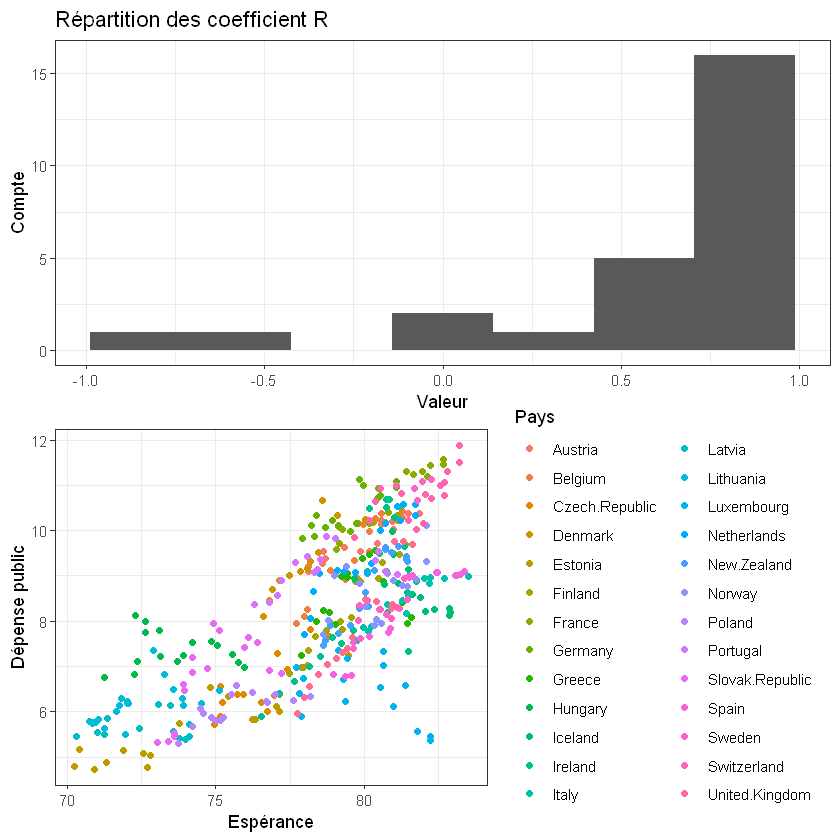

In [33]:
h1 = ggplot(coefs_r) +
geom_histogram(aes(x = Valeur), bins = 7) +
ylab("Compte") +
ggtitle("Répartition des coefficient R") +
theme_bw()

h2 = ggplot(insee) +
geom_point(aes(x = Espérance, y = Depense.public, colour = Pays)) +
ylab("Dépense public") +
theme_bw()

grid.arrange(h1, h2)

On peux donc en conclure qu'il existe une corrélation entre l'espérance de vie et la dépense de santé courante

_Pierre Saunders @saundersp_